In [1]:
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
%matplotlib inline

In [3]:
df = pd.read_csv('CSVs\insurance_data.csv')
df

<>:1: SyntaxWarning: invalid escape sequence '\i'
<>:1: SyntaxWarning: invalid escape sequence '\i'
C:\Users\ACER\AppData\Local\Temp\ipykernel_42160\2990149542.py:1: SyntaxWarning: invalid escape sequence '\i'
  df = pd.read_csv('CSVs\insurance_data.csv')


,age,bought_insurance
0,22,0
1,25,0
2,47,1
3,52,0
4,46,1
5,56,1
6,55,0
7,60,1
8,62,1
9,61,1


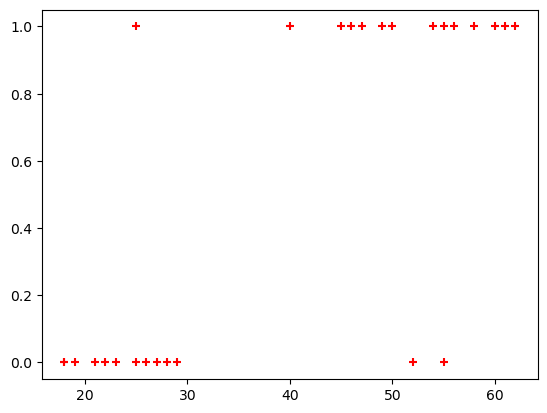

In [4]:
plt.scatter(df.age,df.bought_insurance, marker='+', color='red')
plt.show()

## Splitting the data into train and test data. Test data isnot seen by model

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
#this funcion returns x_train,x_test,y_train,y_test
x_train,x_test,y_train,y_test = train_test_split(df[['age']],df.bought_insurance,test_size=0.1,random_state=20)

In [8]:
x_test

,age
13,29
4,46
1,25


#### importing Logistic Regression(sigmoid or logit function)

In [10]:
from sklearn.linear_model import LogisticRegression

In [11]:
model = LogisticRegression()

In [12]:
model.fit(x_train,y_train)

LogisticRegression()

In [13]:
print("Testing the data wheater they would buy or wont buy insurance")
model.predict(x_test)

Testing the data wheater they would buy or wont buy insurance


array([0, 1, 0], dtype=int64)

In [14]:
print("SCore shows the accuracy of the model")
print("Since the data is small it is showing 100% accurate")
model.score(x_test,y_test)
                   

SCore shows the accuracy of the model
Since the data is small it is showing 100% accurate


1.0

In [15]:
print("THe score of the train model in trained data is ")
model.score(x_train,y_train)

THe score of the train model in trained data is 


0.875

In [16]:
print("Shows the probability of being in one class or other")
print("First class is not buying the insurance probability")
model.predict_proba(x_test)

Shows the probability of being in one class or other
First class is not buying the insurance probability


array([[0.76521326, 0.23478674],
       [0.28378442, 0.71621558],
       [0.84254653, 0.15745347]])

In [17]:
model.predict([[18]])

C:\Samir\Anaconda\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([0], dtype=int64)

### Plotting the Logistic Regression Curve

C:\Samir\Anaconda\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


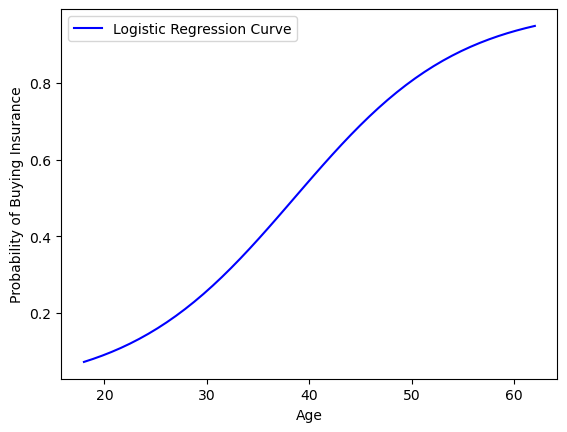

In [19]:
import numpy as np
x_range = np.linspace(df.age.min(), df.age.max()).reshape(-1, 1)

# Predict probability using the trained model
y_prob = model.predict_proba(x_range)[:, 1]  
plt.plot(x_range, y_prob, color='blue', label="Logistic Regression Curve")

# Labels and legend
plt.xlabel("Age")
plt.ylabel("Probability of Buying Insurance")
plt.legend()
plt.show()

## EXERCISE
Download employee retention dataset from here: https://www.kaggle.com/giripujar/hr-analytics.

1. Now do some exploratory data analysis to figure out which variables have direct and clear impact on employee retention (i.e. whether they leave the company or continue to work)
2. Plot bar charts showing impact of employee salaries on retention
3. Plot bar charts showing corelation between department and employee retention
4. Now build logistic regression model using variables that were narrowed down in step 1
5. Measure the accuracy of the model

In [21]:
edf = pd.read_csv("CSVs/HR_comma_sep.csv")
edf

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [22]:
import seaborn as sns

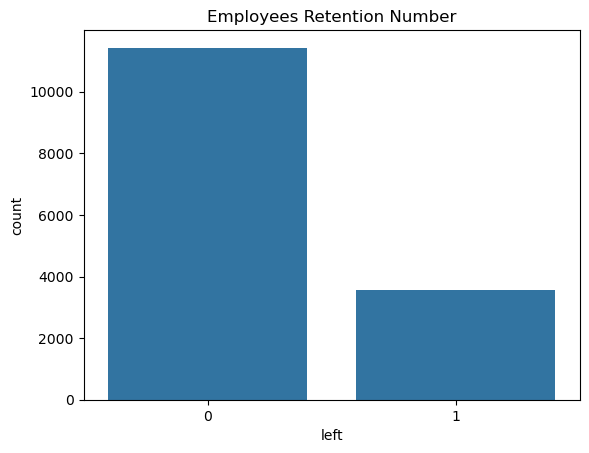

In [23]:
sns.countplot(x=edf['left'])
plt.title("Employees Retention Number")
plt.show()


In [24]:
edf.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [25]:
# left employees
left_emp = edf[edf.left==1]
left_emp.shape

(3571, 10)

In [26]:
# retained employees
retained = edf[edf.left==0]
retained.shape

(11428, 10)

**Average Number for all Columns according to left and retained employee**

In [28]:
#only calculating the average numbers where there is integers
edf.groupby('left').mean(numeric_only=True)



,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


- The vast difference where the employee left is affected by
- **Satisfaction Level, Monthly Hours, Promotion_last_5yrs**

**Impact of Salary on Employee Retentation**

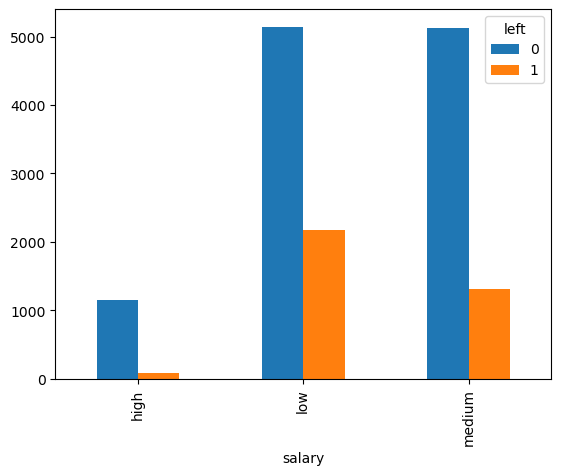

In [31]:
pd.crosstab(edf.salary,edf.left).plot(kind='bar')
plt.show()

- Emloyee with high salary are more likely to stay

**Department wise employee retention rate**

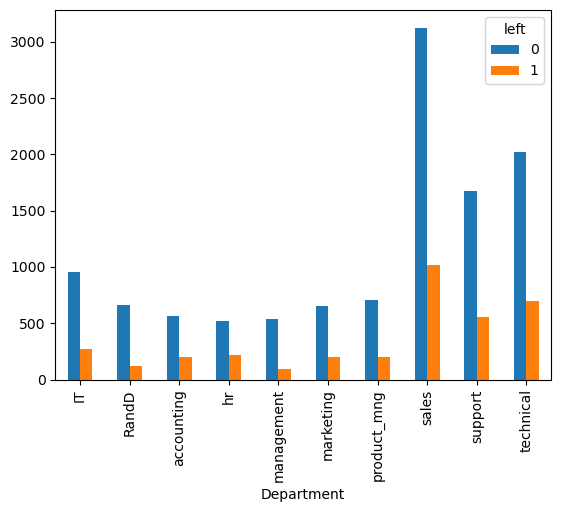

In [34]:
pd.crosstab(edf.Department,edf.left).plot(kind='bar')
plt.show()

- From above chart there seem to be some impact of department on employee retention but it is not major hence we will ignore department in our analysis

### **From the data analysis so far we can conclude that we will use following variables as independant variables in our mode**
- **satisfaction_level**
- **average_montly_hours**
- **promotion_last_5years**
- **salary**

- **So MAking sub dataframe containing only them** 

In [37]:
subdf = edf[['satisfaction_level','average_montly_hours','promotion_last_5years','salary',]]

In [38]:
subdf

,satisfaction_level,average_montly_hours,promotion_last_5years,salary
0,0.38,157,0,low
1,0.80,262,0,medium
2,0.11,272,0,medium
3,0.72,223,0,low
4,0.37,159,0,low
...,...,...,...,...
14994,0.40,151,0,low
14995,0.37,160,0,low
14996,0.37,143,0,low
14997,0.11,280,0,low


- **Using One Hot Encoding (dummy variables) Concept in Salary Column so the alphabet can be converted into numbers which ML model is good at**

In [77]:
salaries_dummies = pd.get_dummies(subdf.salary,prefix="salary")
salaries_dummies = salaries_dummies.astype(int)#got boolean(true/false) converting it to  int (1/0)
salaries_dummies

,salary_high,salary_low,salary_medium
0,0,1,0
1,0,0,1
2,0,0,1
3,0,1,0
4,0,1,0
...,...,...,...
14994,0,1,0
14995,0,1,0
14996,0,1,0
14997,0,1,0


In [79]:
df_with_dummies = pd.concat([subdf,salaries_dummies],axis='columns')

In [81]:
df_with_dummies

,satisfaction_level,average_montly_hours,promotion_last_5years,salary,salary_high,salary_low,salary_medium
0,0.38,157,0,low,0,1,0
1,0.80,262,0,medium,0,0,1
2,0.11,272,0,medium,0,0,1
3,0.72,223,0,low,0,1,0
4,0.37,159,0,low,0,1,0
...,...,...,...,...,...,...,...
14994,0.40,151,0,low,0,1,0
14995,0.37,160,0,low,0,1,0
14996,0.37,143,0,low,0,1,0
14997,0.11,280,0,low,0,1,0


In [85]:
#droppping one dummies column to avoid dummy variable trap and dropping text salary

df_with_dummies.drop('salary',axis='columns',inplace=True)
df_with_dummies.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary_high,salary_low,salary_medium
0,0.38,157,0,0,1,0
1,0.80,262,0,0,0,1
2,0.11,272,0,0,0,1
3,0.72,223,0,0,1,0
4,0.37,159,0,0,1,0


In [87]:
X = df_with_dummies
X.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary_high,salary_low,salary_medium
0,0.38,157,0,0,1,0
1,0.80,262,0,0,0,1
2,0.11,272,0,0,0,1
3,0.72,223,0,0,1,0
4,0.37,159,0,0,1,0


In [91]:
y = edf.left
y

0        1
1        1
2        1
3        1
4        1
        ..
14994    1
14995    1
14996    1
14997    1
14998    1
Name: left, Length: 14999, dtype: int64

#### Train test split

In [93]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.3)

#### Using Logistic Regression

In [95]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [100]:
model.fit(X_train, y_train)

LogisticRegression()

**Generating the prediction who would likely to leave the company according to the logistic regression model parameters prediction**

In [103]:
model.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

#### Accuracy of the Model

In [106]:
model.score(X_test,y_test)

0.7779047619047619